Automatically created module for IPython interactive environment
Opening raw data file C:\Users\iamth\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


C:\Users\iamth\AppData\Local\Temp\ipykernel_12872\3319877540.py:11: FutureWarning: MNE-realtime is discontinued in favor of the Lab Streaming Layer real-time interface availabe in MNE-lsl: https://mne.tools/mne-lsl/
  from mne_realtime import RtEpochs, MockRtClient


Not setting metadata
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Just got epoch 1
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


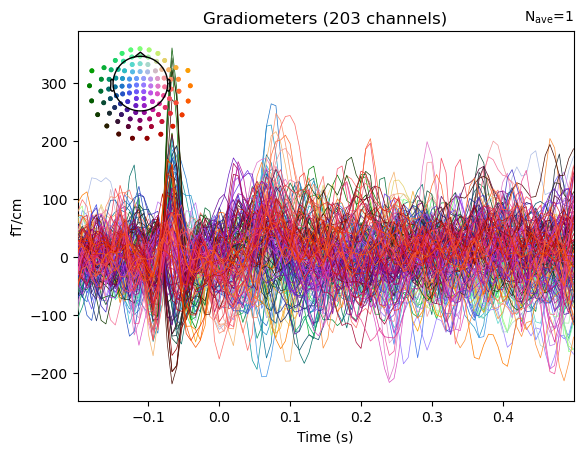

Just got epoch 2
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


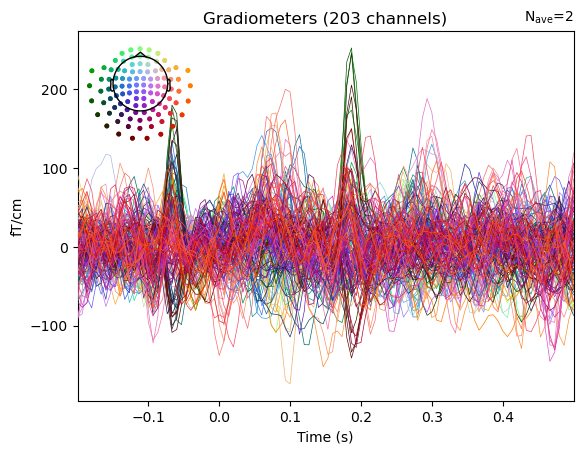

Just got epoch 3
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


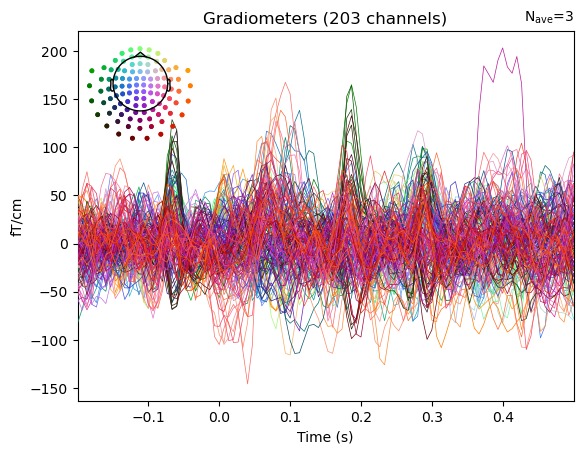

Just got epoch 4
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


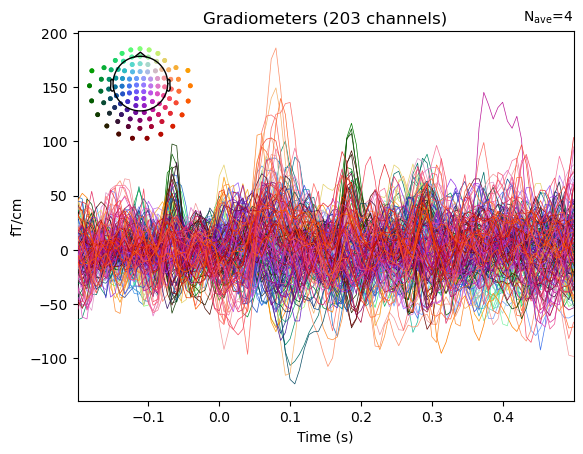

Just got epoch 5
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


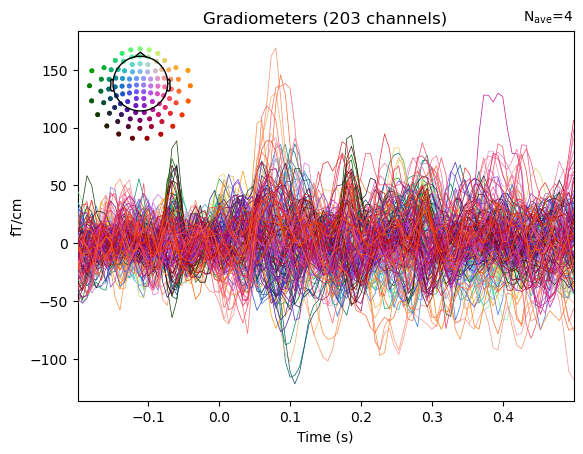

Just got epoch 6
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


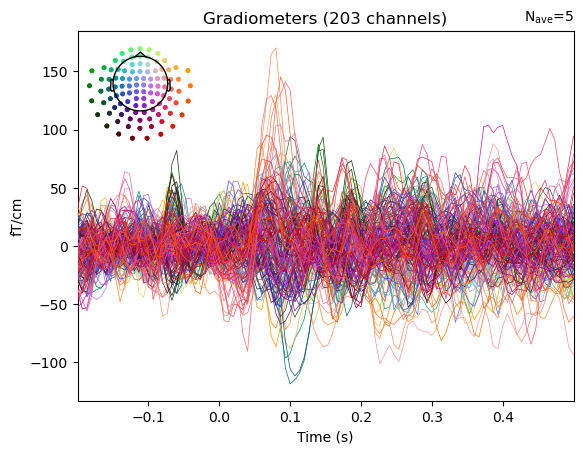

Just got epoch 7
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


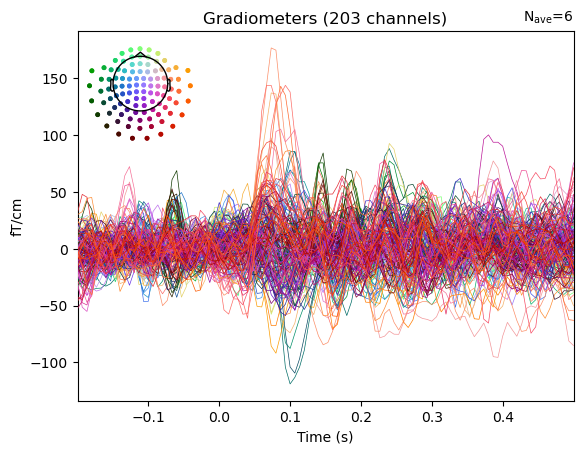

Just got epoch 8
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


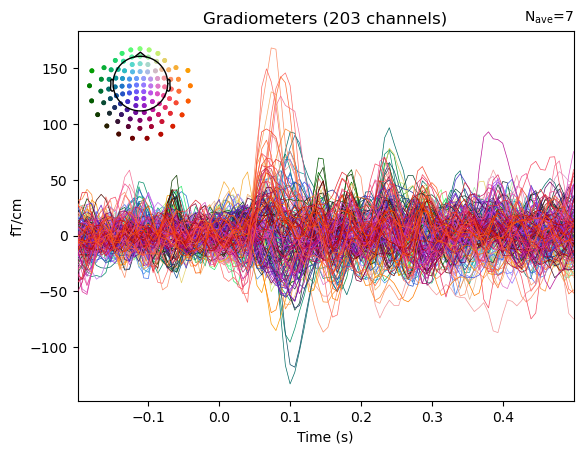

Just got epoch 9
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


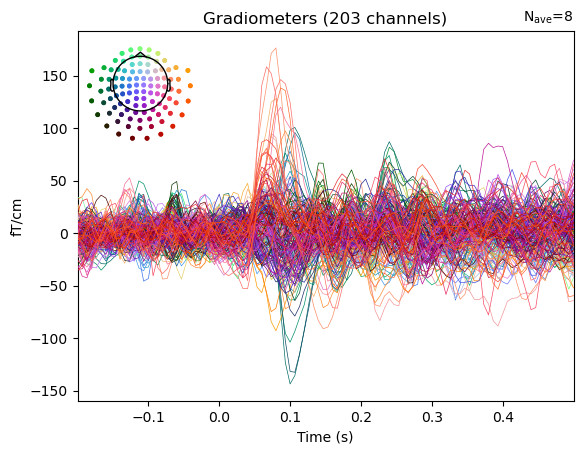

Just got epoch 10
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


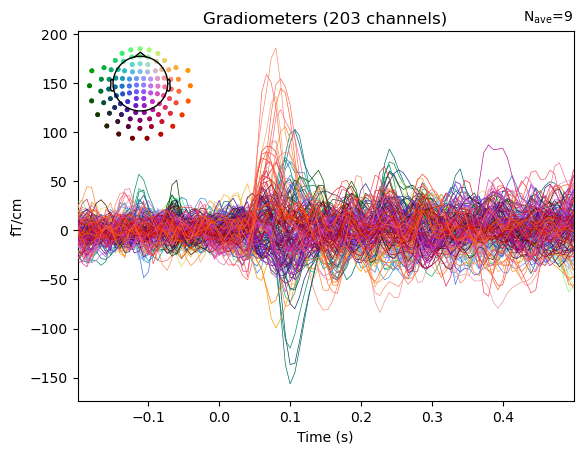

Just got epoch 11
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


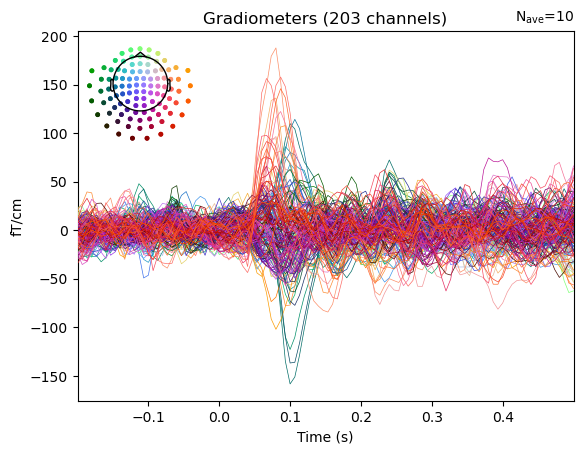

Just got epoch 12
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


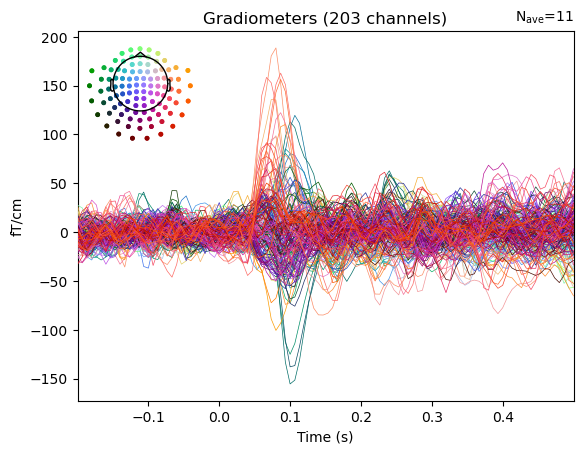

Just got epoch 13
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


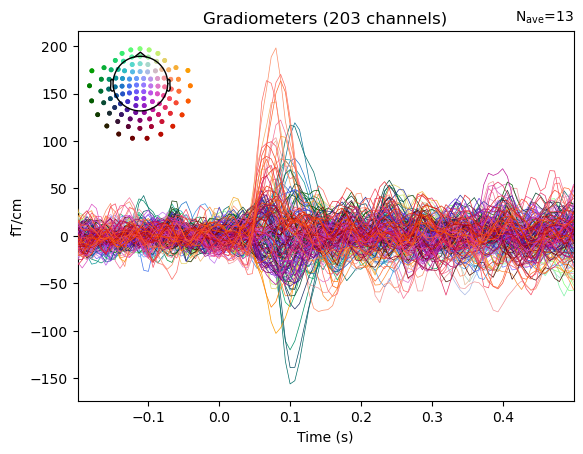

Just got epoch 14
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


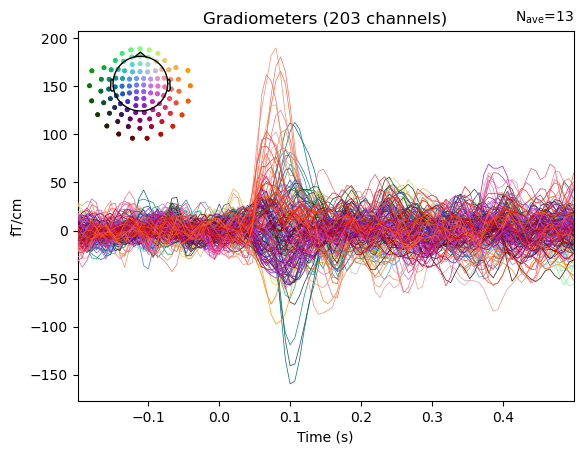

Just got epoch 15
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


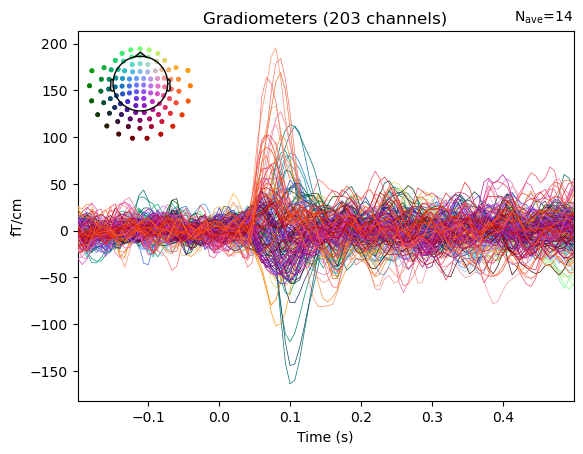

Just got epoch 16
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


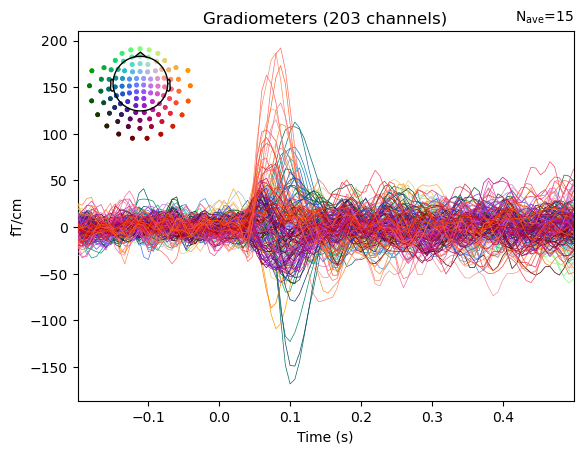

Just got epoch 17
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


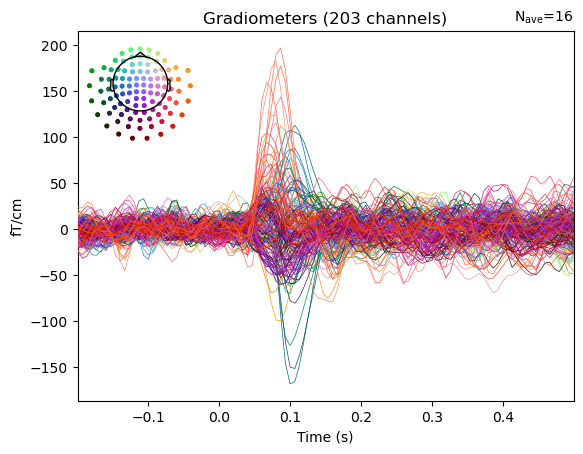

Just got epoch 18
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


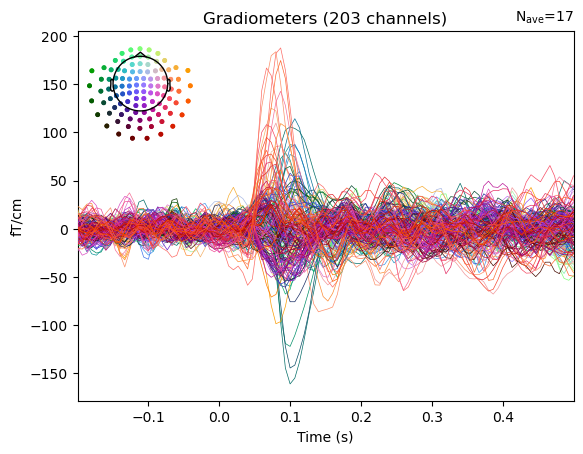

Just got epoch 19
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


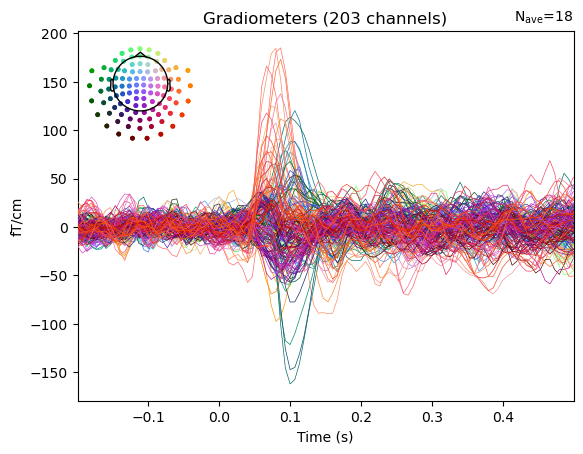

Just got epoch 20
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


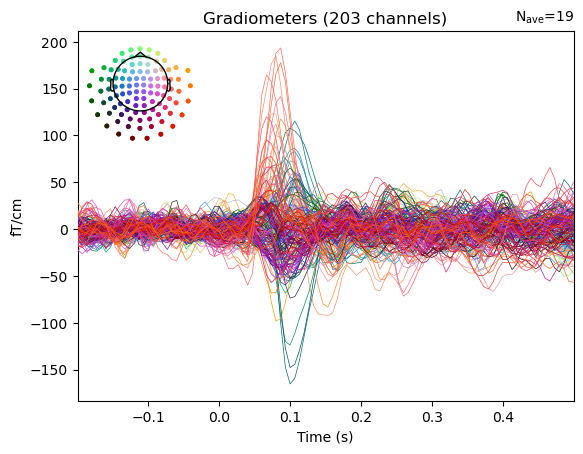

Just got epoch 21
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


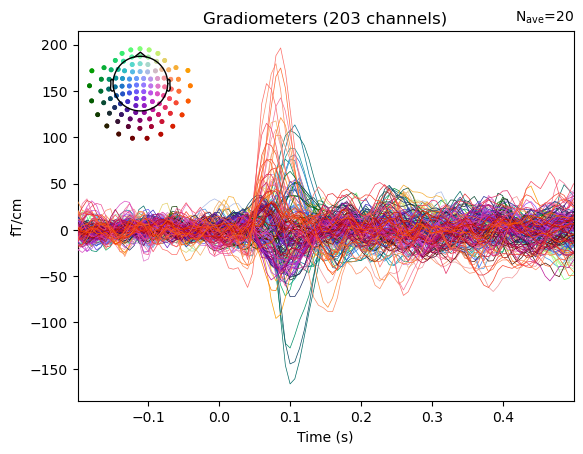

Just got epoch 22
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


KeyboardInterrupt: 

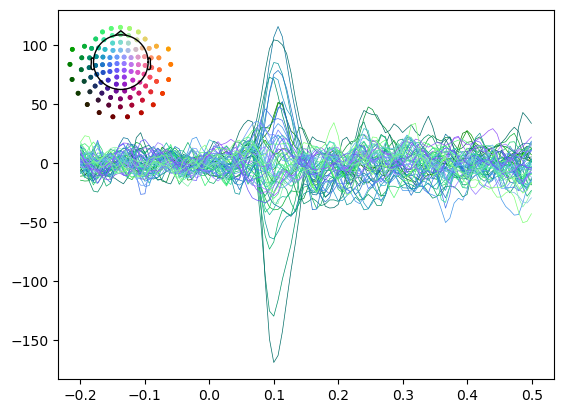

In [2]:
# Authors: Martin Luessi <mluessi@nmr.mgh.harvard.edu>
#          Mainak Jas <mainak@neuro.hut.fi>
#
# License: BSD (3-clause)

import matplotlib.pyplot as plt

import mne
from mne.datasets import sample

from mne_realtime import RtEpochs, MockRtClient

print(__doc__)

# Fiff file to simulate the realtime client
data_path = sample.data_path()
raw_fname = data_path / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = mne.io.read_raw_fif(raw_fname, preload=True)

# select gradiometers
picks = mne.pick_types(raw.info, meg='grad', eeg=False, eog=True,
                       stim=True, exclude=raw.info['bads'])

# select the left-auditory condition
event_id, tmin, tmax = 1, -0.2, 0.5

# create the mock-client object
rt_client = MockRtClient(raw)

# create the real-time epochs object
rt_epochs = RtEpochs(rt_client, event_id, tmin, tmax, picks=picks,
                     decim=1, reject=dict(grad=4000e-13, eog=150e-6))

# start the acquisition
rt_epochs.start()

# send raw buffers
rt_client.send_data(rt_epochs, picks, tmin=0, tmax=150, buffer_size=1000)
for ii, ev in enumerate(rt_epochs.iter_evoked()):
    print("Just got epoch %d" % (ii + 1))
    ev.pick_types(meg=True, eog=False)  # leave out the eog channel
    if ii == 0:
        evoked = ev
    else:
        evoked = mne.combine_evoked([evoked, ev], weights='nave')
    plt.clf()  # clear canvas
    evoked.plot(axes=plt.gca(), time_unit='s')  # plot on current figure
    plt.pause(0.05)